# Percentile Analysis

In [40]:
import sys

import numpy as np
from matplotlib import pylab as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns

sys.path.append("..")
from constants import MIN_DAYSAHEAD, MAX_DAYSAHEAD, BIN_FREQ_PER_DAY

sns.set()

# Load Data Frames from Disk

In [52]:
df = pd.DataFrame()
df_baseline = pd.DataFrame()

for i in range(MIN_DAYSAHEAD, MAX_DAYSAHEAD + 1):
    # Load model dataframe
    df_cur = pd.read_csv(
        f"../data/processed/skew_gaussian/k150/delta_window8/percentiles_daysahead{i}_R000.csv"
    )
    df["TruePercentile"] = df_cur["TruePercentile"]
    df[f"{i} Days"] = df_cur["ObservedPercentile"]

    # Load baseline dataframe
    df_cur = pd.read_csv(
        f"../data/processed/baseline/percentiles_daysahead{i}_R000.csv"
    )
    df_baseline["TruePercentile"] = df_cur["TruePercentile"]
    df_baseline[f"{i} Days"] = df_cur["ObservedPercentile"]

In [42]:
df

,TruePercentile,1 Days,2 Days,3 Days,4 Days,5 Days,6 Days,7 Days
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,5.1,5.1,4.8,5.3,5.3,5.2,5.5
2,10,10.3,10.3,10.5,10.2,10.9,10.4,10.6
3,15,15.4,15.4,15.5,15.2,16.2,15.5,15.7
4,20,20.4,20.2,20.3,20.3,21.6,20.2,21.1
5,25,25.7,24.9,25.1,25.5,27.2,25.1,26.3
6,30,30.7,29.7,30.1,30.6,32.4,30.2,31.2
7,35,35.5,34.2,35.0,35.5,37.3,35.1,36.1
8,40,40.3,39.3,39.8,40.1,42.1,39.9,40.7
9,45,45.2,44.2,45.0,45.1,46.9,44.5,45.6


In [43]:
df_baseline

,TruePercentile,1 Days,2 Days,3 Days,4 Days,5 Days,6 Days,7 Days
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,6.4,6.4,6.4,6.1,6.5,6.5,6.6
2,10,12.4,12.6,12.4,12.8,12.9,12.7,13.4
3,15,18.2,18.6,18.9,19.0,19.1,19.1,19.4
4,20,23.9,24.5,24.3,24.9,25.3,25.2,25.8
5,25,30.2,30.2,30.5,31.1,31.6,31.3,31.8
6,30,35.6,36.1,36.2,36.7,37.5,37.0,37.9
7,35,41.1,41.4,42.1,42.3,42.8,42.4,43.5
8,40,46.3,46.6,47.7,47.5,48.5,48.0,48.6
9,45,51.0,51.4,52.7,52.5,53.4,53.0,53.5


# Model Results

In [44]:
pd.set_option('display.float_format', '{:.1f}'.format)
df[df.TruePercentile.apply(lambda x: x in [25, 50, 75])]

,TruePercentile,1 Days,2 Days,3 Days,4 Days,5 Days,6 Days,7 Days
5,25,25.7,24.9,25.1,25.5,27.2,25.1,26.3
10,50,49.9,49.2,49.8,49.9,51.5,48.9,50.2
15,75,73.9,73.2,73.4,73.1,73.8,71.0,71.3


In [45]:
df_err = pd.DataFrame(
    {
        f"{i} Days": df["TruePercentile"] - df[f"{i} Days"]
        for i in range(MIN_DAYSAHEAD, MAX_DAYSAHEAD + 1)
    }
)
df_err

,1 Days,2 Days,3 Days,4 Days,5 Days,6 Days,7 Days
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.1,-0.1,0.2,-0.3,-0.3,-0.2,-0.5
2,-0.3,-0.3,-0.5,-0.2,-0.9,-0.4,-0.6
3,-0.4,-0.4,-0.5,-0.2,-1.2,-0.5,-0.7
4,-0.4,-0.2,-0.3,-0.3,-1.6,-0.2,-1.1
5,-0.7,0.1,-0.1,-0.5,-2.2,-0.1,-1.3
6,-0.7,0.3,-0.1,-0.6,-2.4,-0.2,-1.2
7,-0.5,0.8,0.0,-0.5,-2.3,-0.1,-1.1
8,-0.3,0.7,0.2,-0.1,-2.1,0.1,-0.7
9,-0.2,0.8,-0.0,-0.1,-1.9,0.5,-0.6


# Baseline Results

In [46]:
df_baseline[df_baseline.TruePercentile.apply(lambda x: x in [25, 50, 75])]

,TruePercentile,1 Days,2 Days,3 Days,4 Days,5 Days,6 Days,7 Days
5,25,30.2,30.2,30.5,31.1,31.6,31.3,31.8
10,50,55.7,56.1,57.2,57.1,58.3,57.5,58.0
15,75,77.2,77.9,78.0,77.9,78.2,78.3,77.2


In [47]:
df_baseline_err = pd.DataFrame(
    {
        f"{i} Days": df_baseline["TruePercentile"] - df_baseline[f"{i} Days"]
        for i in range(MIN_DAYSAHEAD, MAX_DAYSAHEAD + 1)
    }
)

In [48]:
df_baseline_err

,1 Days,2 Days,3 Days,4 Days,5 Days,6 Days,7 Days
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.4,-1.4,-1.4,-1.1,-1.5,-1.5,-1.6
2,-2.4,-2.6,-2.4,-2.8,-2.9,-2.7,-3.4
3,-3.2,-3.6,-3.9,-4.0,-4.1,-4.1,-4.4
4,-3.9,-4.5,-4.3,-4.9,-5.3,-5.2,-5.8
5,-5.2,-5.2,-5.5,-6.1,-6.6,-6.3,-6.8
6,-5.6,-6.1,-6.2,-6.7,-7.5,-7.0,-7.9
7,-6.1,-6.4,-7.1,-7.3,-7.8,-7.4,-8.5
8,-6.3,-6.6,-7.7,-7.5,-8.5,-8.0,-8.6
9,-6.0,-6.4,-7.7,-7.5,-8.4,-8.0,-8.5


# Comparison Plot 

In [49]:
def make_plot(df_plot, title, ax):
    for i in range(MIN_DAYSAHEAD, MAX_DAYSAHEAD + 1):
        ax.plot(df_plot.TruePercentile, df_plot[f"{i} Days"], "o-", label=f"{i} Days")
    ax.plot(
        df_plot.TruePercentile,
        df_plot.TruePercentile,
        color="red",
        label="Identity",
        linestyle="dashed",
    )
    ax.legend().set_title('Days Ahead')
    ax.set_xlabel("True Percentile")
    ax.set_ylabel("Observed Percentile")
    ax.set_xlim(0, 101)
    ax.set_ylim(0, 101)
    ax.set_yticklabels([str(p) + "%" for p in ax.get_xticks()])
    ax.set_xticklabels([str(p) + "%" for p in ax.get_xticks()])
    ax.set_title(title)

/tmp/ipykernel_3071853/3074920633.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(p) + "%" for p in ax.get_xticks()])
/tmp/ipykernel_3071853/3074920633.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(p) + "%" for p in ax.get_xticks()])


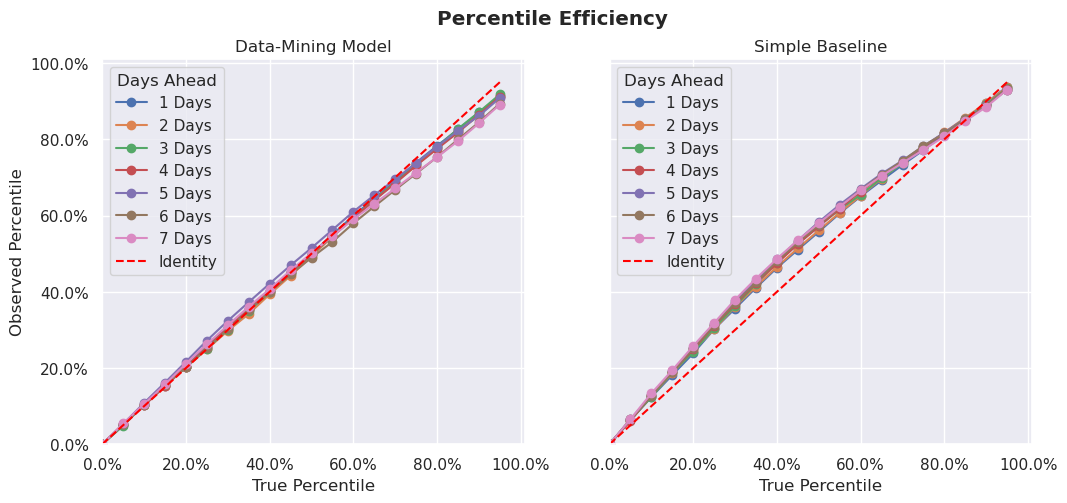

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

make_plot(df, "Data-Mining Model", axes[0])
make_plot(df_baseline, "Simple Baseline", axes[1])
axes[1].set_ylabel('')
plt.suptitle('Percentile Efficiency', fontweight='bold')
plt.savefig("../plots.percentile_efficiency.png", dpi=300)

In [51]:
np.abs(df_baseline_err) - np.abs(df_err)

,1 Days,2 Days,3 Days,4 Days,5 Days,6 Days,7 Days
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.3,1.4,1.2,0.9,1.2,1.3,1.1
2,2.1,2.3,1.9,2.6,2.0,2.3,2.8
3,2.8,3.2,3.3,3.9,2.9,3.6,3.8
4,3.5,4.3,4.0,4.6,3.7,5.0,4.7
5,4.5,5.1,5.4,5.6,4.4,6.2,5.6
6,4.9,5.8,6.1,6.1,5.1,6.8,6.7
7,5.6,5.6,7.0,6.8,5.5,7.3,7.4
8,6.0,5.9,7.5,7.3,6.3,7.9,7.9
9,5.9,5.6,7.7,7.4,6.5,7.5,7.9
